<a href="https://colab.research.google.com/github/herbertins/cadastro_clientes/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Inteligência Artificial para classificação

### Etapas para Criar um Modelo de Classificação Eficiente

Criar um modelo de classificação eficiente envolve uma série de etapas organizadas, desde a coleta de dados até a implantação e monitoramento do modelo. Abaixo estão as etapas detalhadas:

\

#### **1. Definição do Problema**
Antes de começar a modelagem, é essencial entender:
*	**Objetivo:** O que você quer prever? (Ex.: classificar vinhos)
*	**Variável alvo:** Qual é a variável de saída? (Ex.: bom ou ruim)
*	**Métrica de sucesso:** Como você medirá a performance? (Ex.: Acurácia, F1-Score, ROC-AUC)

\
#### **2. Coleta de Dados**
*	**Fontes de dados:** Bases públicas, bancos de dados internos, APIs, etc.
*	**Qualidade dos dados:** Certifique-se de que os dados sejam representativos e relevantes para o problema.

\
#### **3. Exploração e Análise de Dados**
* **Análise estatística:** Média, mediana, desvio padrão das variáveis.
* **Visualização:** Gráficos de dispersão, histogramas, mapas de calor de correlação.
* **Identificação de padrões**: Verifique relações entre variáveis e a variável alvo.
* Detecção de outliers e valores ausentes.

\
#### **4. Pré-processamento dos Dados**
* **Tratamento de valores ausentes:** Imputação, remoção ou substituição.
* **Remoção ou tratamento de outliers:** Para evitar distorção no modelo
* **Codificação de variáveis categóricas:**
  * Label Encoding
  * One-Hot Encoding
* **Escalonamento de variáveis numéricas:**
  * StandardScaler (para dados com distribuição normal)
  * MinMaxScaler (para escalonamento entre 0 e 1)
* **Divisão dos dados:**
 * Treinamento e teste (ex.: 70% treino, 30% teste)
 * Validação cruzada para melhor generalização.

\
#### **5. Seleção de Recursos**
* **Importância das variáveis:** Identificar quais variáveis mais contribuem para a previsão.
* **Métodos utilizados:**
  * Correlação
  * Métodos de árvore (ex.: Random Forest Feature Importance)
  * Seleção recursiva de atributos (RFE)

\
#### **6. Escolha do Modelo**
Selecione algoritmos com base no problema e nas características dos dados:
* **Modelos simples:**
  * Regressão Logística
  * K-Nearest Neighbors (KNN)
* **Modelos mais complexos:**
  * Random Forest
  * Gradient Boosting Machines (GBM)
  * Support Vector Machines (SVM)
  * Redes Neurais (para grandes conjuntos de dados)

\
#### **7. Treinamento do Modelo**
* Utilize os dados de treinamento para ajustar o modelo.
* **Ajuste hiperparâmetros com métodos como:**
  * Grid Search
  * Random Search
  * Bayesian Optimization

\
#### **8. Avaliação do Modelo**
* **Métricas comuns para classificação:**
  * Acurácia
  * Precisão, Recall e F1-Score
  * Curva ROC e AUC
  * Matriz de confusão
* **Validação cruzada:**
 * Reduz viés e melhora a generalização.

\
#### **9. Ajuste e Otimização**
* **Overfitting:** Se o modelo performa bem no treino mas mal no teste, considere regularização ou simplificação do modelo.
* **Underfitting:** Se o modelo performa mal em ambos, tente modelos mais complexos ou adicione mais recursos.
* **Feature Engineering:** Crie novas variáveis a partir das existentes para melhorar o desempenho.

\

### 1. Definição do Problema

Projeto de Ciência de Dados: Classificação da Qualidade de Vinhos Verdes Portugueses

Este projeto tem como objetivo aplicar e validar conhecimentos em algoritmos supervisionados de machine learning, com foco na classificação da qualidade de vinhos verdes portugueses, utilizando dados reais provenientes do artigo de Cortez et al. (2009). A base de dados, disponível no Kaggle, contempla informações físico-químicas de vinhos das variantes branca e tinta, além de uma variável de qualidade sensorial atribuída a cada amostra.

#### 2. Coleta de Dados



In [101]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

from IPython.display import Markdown, display


# Configurar estilo dos gráficos
sns.set_style("whitegrid")

# Exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Ignorar warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('winequalityN.csv')
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3. Exploração e Análise de dados

In [102]:
data['type'].value_counts(normalize=True)

,proportion
type,
white,0.753886
red,0.246114


In [103]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [104]:
# verificando dados nulos
data.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [105]:
display(Markdown("### 📊 Estatísticas Descritivas do Dataset"))

description = data.describe()
description

### 📊 Estatísticas Descritivas do Dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [106]:
description.columns = description.columns.str.strip()
feature_types = {
    'type': 'Categórica',
    'fixed acidity': 'Contínua',
    'volatile acidity': 'Contínua',
    'citric acid': 'Contínua',
    'residual sugar': 'Contínua',
    'chlorides': 'Contínua',
    'free sulfur dioxide': 'Contínua',
    'total sulfur dioxide': 'Contínua',
    'density': 'Contínua',
    'pH': 'Contínua',
    'sulphates': 'Contínua',
    'alcohol': 'Contínua',
    'quality': 'Discreta',
    'opinion': 'Categórica'
}

def find_collumns(col_name, columns):
    col_name_clean = col_name.strip().lower().replace(" ", "")
    for col in columns:
        if col.strip().lower().replace(" ", "") == col_name_clean:
            return col
    return None

col_widths = {
    "Nome": 25,
    "Tipo": 12,
    "Média": 10,
    "Desvio Padrão": 14
}

def format_col(text, width):
    return f"{str(text):<{width}}"

dataFrame = (
    f"| {format_col('Nome', col_widths['Nome'])} "
    f"| {format_col('Tipo', col_widths['Tipo'])} "
    f"| {format_col('Média', col_widths['Média'])} "
    f"| {format_col('Desvio Padrão', col_widths['Desvio Padrão'])} |\n"
)

# Linha separadora
dataFrame += (
    f"|{'-' * (col_widths['Nome'] + 2)}"
    f"|{'-' * (col_widths['Tipo'] + 2)}"
    f"|{'-' * (col_widths['Média'] + 2)}"
    f"|{'-' * (col_widths['Desvio Padrão'] + 2)}|\n"
)

for feature, f_type in feature_types.items():
    column = find_collumns(feature, description.columns)

    if column:
        media = round(description.loc['mean', column], 2)
        desvio = round(description.loc['std', column], 2)
    else:
        media = desvio = "N/A"

    if f_type == "Categórica":
        media = desvio = "N/A"


    dataFrame += (



        f"| {format_col(feature, col_widths['Nome'])} "
        f"| {format_col(f_type, col_widths['Tipo'])} "
        f"| {format_col(media, col_widths['Média'])} "
        f"| {format_col(desvio, col_widths['Desvio Padrão'])} |\n"
    )

print(dataFrame)


| Nome                      | Tipo         | Média      | Desvio Padrão  |
|---------------------------|--------------|------------|----------------|
| type                      | Categórica   | N/A        | N/A            |
| fixed acidity             | Contínua     | 7.22       | 1.3            |
| volatile acidity          | Contínua     | 0.34       | 0.16           |
| citric acid               | Contínua     | 0.32       | 0.15           |
| residual sugar            | Contínua     | 5.44       | 4.76           |
| chlorides                 | Contínua     | 0.06       | 0.04           |
| free sulfur dioxide       | Contínua     | 30.53      | 17.75          |
| total sulfur dioxide      | Contínua     | 115.74     | 56.52          |
| density                   | Contínua     | 0.99       | 0.0            |
| pH                        | Contínua     | 3.22       | 0.16           |
| sulphates                 | Contínua     | 0.53       | 0.15           |
| alcohol                

### 4. Pré Processamento

In [107]:
#Tratamento de dados para processamento
wineWhite_df = data[data['type'] == 'white']
wineWhite_df['opinion'] = data['quality'].apply(lambda x: 0 if x<=5 else 1)

x = wineWhite_df.drop(columns=['quality', 'opinion'])
x = pd.get_dummies(x, columns=['type'], drop_first=True)
y = wineWhite_df['opinion']

Como existe alguns dados nulos vamos, fazer inferencia desses dados utilizando a média da feature

In [108]:
from sklearn.impute import SimpleImputer
import numpy as np

has_nulls_before = x.isnull().values.any()
print(f"Possui valores nulos antes da imputação? {'Sim' if has_nulls_before else 'Não'}")

imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# Verificar se ainda existem valores nulos após a imputação
has_nulls_after = np.isnan(x).any()
print(f"Possui valores nulos após a imputação? {'Sim' if has_nulls_after else 'Não'}")


Possui valores nulos antes da imputação? Sim
Possui valores nulos após a imputação? Não


In [109]:
from sklearn.model_selection import train_test_split

#Divisão dos dados em testes e treino  30% teste 70% treino
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


## b. Regressão logistica

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


In [111]:
scoring_metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

### Treinamento do modelo

In [112]:
modelRegLog = LogisticRegression(max_iter=1000)

modelRegLog.fit(X_train, y_train)

results = {
    metric: cross_val_score(modelRegLog, X_scaled, y, cv=kfold, scoring=scoring_metrics[metric])
    for metric in scoring_metrics
}

metrics_summary = {
    metric: {
        'mean': round(results[metric].mean(), 4),
        'std': round(results[metric].std(), 4)
    }
    for metric in results
}

for metric, values in metrics_summary.items():
    print(f"{metric.capitalize()} - Média: {values['mean']} | Desvio Padrão: {values['std']}")

Accuracy - Média: 0.7495 | Desvio Padrão: 0.0166
Precision - Média: 0.7752 | Desvio Padrão: 0.0154
Recall - Média: 0.8788 | Desvio Padrão: 0.0183
F1 - Média: 0.8235 | Desvio Padrão: 0.0112


**Arvore de decisão**

In [113]:
modelTree = DecisionTreeClassifier(random_state=42)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

modelTree.fit(X_train, y_train)

results = {
    metric: cross_val_score(modelTree, X_scaled, y, cv=kfold, scoring=scoring_metrics[metric])
    for metric in scoring_metrics
}

metrics_summary = {
    metric: {
        'mean': round(results[metric].mean(), 4),
        'std': round(results[metric].std(), 4)
    }
    for metric in results
}

for metric, values in metrics_summary.items():
    print(f"{metric.capitalize()} - Média: {values['mean']} | Desvio Padrão: {values['std']}")

Accuracy - Média: 0.7969 | Desvio Padrão: 0.0167
Precision - Média: 0.8524 | Desvio Padrão: 0.0155
Recall - Média: 0.8404 | Desvio Padrão: 0.0155
F1 - Média: 0.8462 | Desvio Padrão: 0.0125


**SVM**

In [114]:
modelSVM = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

modelSVM.fit(X_train, y_train)

results = {
    metric: cross_val_score(modelSVM, X_scaled, y, cv=kfold, scoring=scoring_metrics[metric])
    for metric in scoring_metrics
}

metrics_summary = {
    metric: {
        'mean': round(results[metric].mean(), 4),
        'std': round(results[metric].std(), 4)
    }
    for metric in results
}

for metric, values in metrics_summary.items():
    print(f"{metric.capitalize()} - Média: {values['mean']} | Desvio Padrão: {values['std']}")

Accuracy - Média: 0.7856 | Desvio Padrão: 0.0139
Precision - Média: 0.8113 | Desvio Padrão: 0.0146
Recall - Média: 0.8837 | Desvio Padrão: 0.0137
F1 - Média: 0.8458 | Desvio Padrão: 0.0093


In [115]:
models = {
    "Logistic Regression": modelRegLog,
    "Decision Tree": modelTree,
    "Support Vector Machine": modelSVM
}

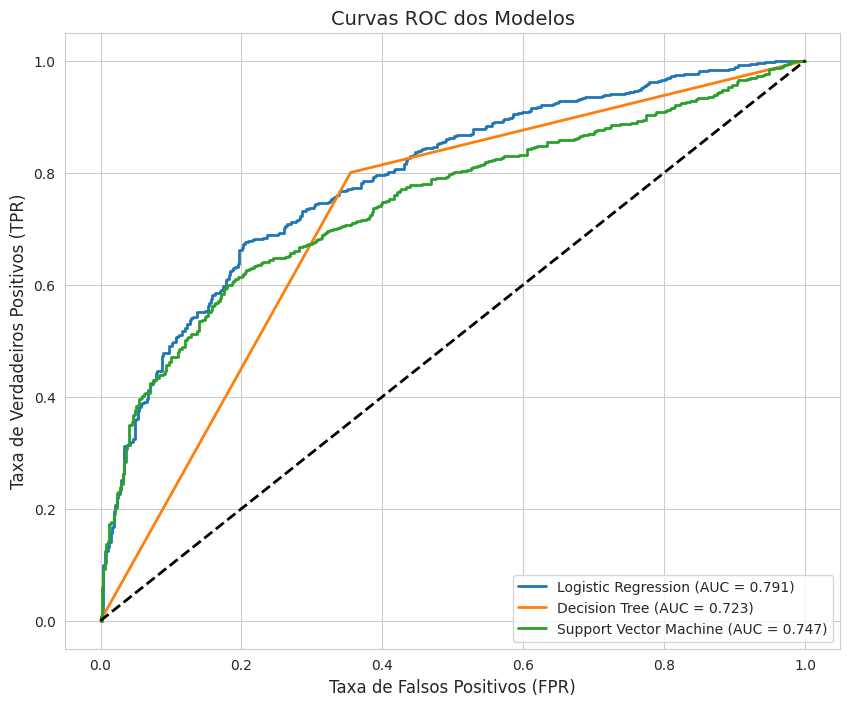

In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

aucs = []

# Iterando sobre os modelos para calcular e plotar as curvas ROC
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Linha de referência para um classificador aleatório
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Escolha o melhor modelo com base na AUC média
melhor_modelo = max(models, key=lambda model: np.mean([auc for auc in aucs]))
# Configurações do gráfico
plt.title('Curvas ROC dos Modelos', fontsize=14)
plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

In [117]:
data = pd.read_csv('winequalityN.csv')

wineRed_df = data[data['type'] == 'red'].copy()
wineRed_df['opinion'] = wineRed_df['quality'].apply(lambda x: 0 if x <= 5 else 1)

X = wineRed_df.drop(columns=['quality', 'opinion'])
y = wineRed_df['opinion']

X = pd.get_dummies(X, columns=['type'], drop_first=True)

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

if melhor_modelo == 'Logistic Regression':
    y_pred_red = modelRegLog.predict(X_test)
elif melhor_modelo == 'Decision Tree':
    y_pred_red = modelTree.predict(y_test)
else:
    y_pred_red = modelSVM.predict(y_test)

vinhos_bons = np.sum(y_pred_red)
vinhos_ruins = len(y_pred_red) - vinhos_bons

print(f"Quantidade de vinhos bons: {vinhos_bons}")
print(f"Quantidade de vinhos ruins: {vinhos_ruins}")

# Avaliando o desempenho do modelo
accuracy_red = accuracy_score(y_test, y_pred_red)
precision_red = precision_score(y_test, y_pred_red)
recall_red = recall_score(y_test, y_pred_red)
f1_red = f1_score(y_test, y_pred_red)

# Exibindo as métricas de desempenho
print("Desempenho do modelo nos dados de vinho tinto:")
print(f"Acurácia: {accuracy_red:.4f}")
print(f"Precisão: {precision_red:.4f}")
print(f"Recall: {recall_red:.4f}")
print(f"F1-Score: {f1_red:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

Quantidade de vinhos bons: 149
Quantidade de vinhos ruins: 331
Desempenho do modelo nos dados de vinho tinto:
Acurácia: 0.6417
Precisão: 0.8188
Recall: 0.4569
F1-Score: 0.5865
AUC-ROC: 0.6651
